In [27]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.optimize import curve_fit
from scipy.stats import linregress
import matplotlib.pyplot as plt

### Problem 2.1

In [28]:
# Define the file path
file_path = r'C:/Users/jhyang/OneDrive/文档/GitHub_Projects/MSE_760/Lab3-Assignment/Problem_2-1/prall.txt'

# Load the data and skip the header row if it exists
data = pd.read_csv(file_path, delim_whitespace=True, skiprows=1, 
                   names=['Temperature', 'Pressure', 'Volume', 'Energy'])

C:\Users\jhyang\AppData\Local\Temp\ipykernel_24408\4170716334.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, skiprows=1,


Melting Temperature during Heating: 1271.77595335624 K
Melting Temperature during Cooling: 1094.85318642092 K


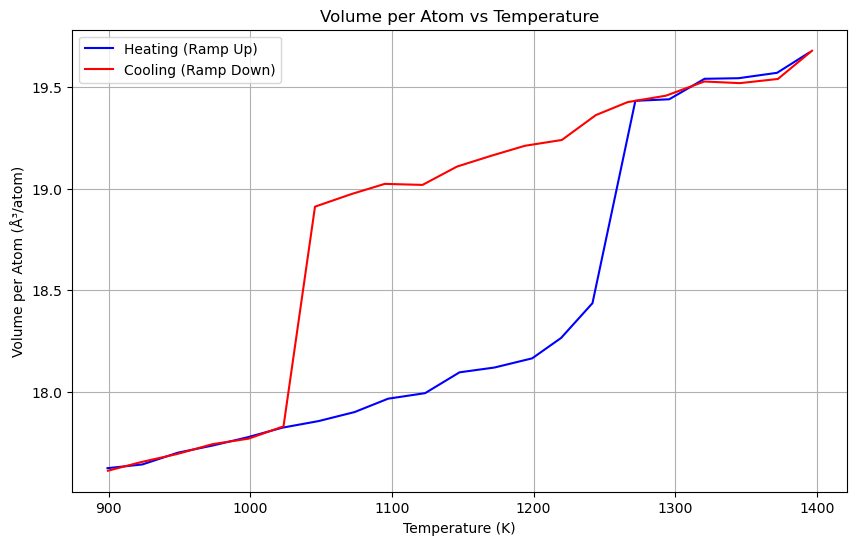

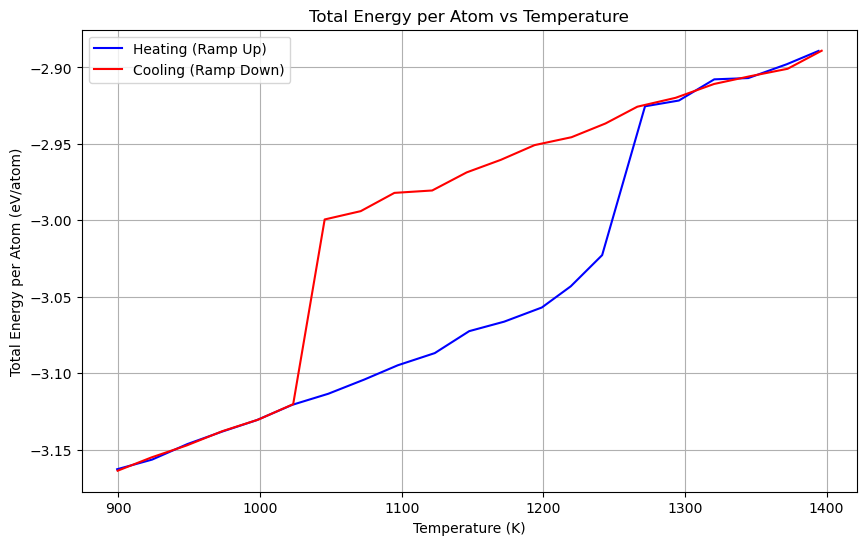

In [29]:
# Convert Volume and Energy to per atom values (assuming 32 atoms in simulation)
data['Volume_per_atom'] = data['Volume'] / 32
data['Energy_per_atom'] = data['Energy']

# Separate heating (ramp-up) and cooling (ramp-down) data
# Assuming the data is ordered such that the first half is ramp-up and the second half is ramp-down
mid_index = len(data) // 2
heating_data = data[:mid_index]
cooling_data = data[mid_index:]

# Identify melting temperature by finding the largest difference in energy for each phase
heating_temp_melt = heating_data['Temperature'][heating_data['Energy_per_atom'].diff().idxmax()]
cooling_temp_melt = cooling_data['Temperature'][cooling_data['Energy_per_atom'].diff().idxmax()]

# Print the melting temperatures
print(f"Melting Temperature during Heating: {heating_temp_melt} K")
print(f"Melting Temperature during Cooling: {cooling_temp_melt} K")

# Plot Volume per atom vs Temperature
plt.figure(figsize=(10, 6))
plt.plot(heating_data['Temperature'], heating_data['Volume_per_atom'], label='Heating (Ramp Up)', color='blue')
plt.plot(cooling_data['Temperature'], cooling_data['Volume_per_atom'], label='Cooling (Ramp Down)', color='red')
plt.xlabel('Temperature (K)')
plt.ylabel('Volume per Atom (Å³/atom)')
plt.title('Volume per Atom vs Temperature')
plt.legend()
plt.grid(True)
plt.show()

# Plot Energy per atom vs Temperature
plt.figure(figsize=(10, 6))
plt.plot(heating_data['Temperature'], heating_data['Energy_per_atom'], label='Heating (Ramp Up)', color='blue')
plt.plot(cooling_data['Temperature'], cooling_data['Energy_per_atom'], label='Cooling (Ramp Down)', color='red')
plt.xlabel('Temperature (K)')
plt.ylabel('Total Energy per Atom (eV/atom)')
plt.title('Total Energy per Atom vs Temperature')
plt.legend()
plt.grid(True)
plt.show()

### Problem 2.2

In [30]:
# Define melting temperatures from previous answer
heating_melt_temp = 1271.78  # K
cooling_melt_temp = 1094.85  # K

# Find energy just before and after the transition during heating
heating_before_transition = heating_data[heating_data['Temperature'] < heating_melt_temp]['Energy_per_atom'].iloc[-1]
heating_after_transition = heating_data[heating_data['Temperature'] > heating_melt_temp]['Energy_per_atom'].iloc[0]
latent_heat_heating = heating_after_transition - heating_before_transition

# Find energy just before and after the transition during cooling
cooling_before_transition = cooling_data[cooling_data['Temperature'] > cooling_melt_temp]['Energy_per_atom'].iloc[0]
cooling_after_transition = cooling_data[cooling_data['Temperature'] < cooling_melt_temp]['Energy_per_atom'].iloc[-1]
latent_heat_cooling = cooling_after_transition - cooling_before_transition

# Print the latent heat values
print(f"Latent Heat during Heating: {latent_heat_heating:.4f} eV/atom")
print(f"Latent Heat during Cooling: {latent_heat_cooling:.4f} eV/atom")


Latent Heat during Heating: 0.0038 eV/atom
Latent Heat during Cooling: -0.2748 eV/atom


### Problem 2.3

Specific Heat Coefficient A: 64.1252 J/mol or J/mol/K
Specific Heat Coefficient B: -0.0055 J/mol or J/mol/K


C:\Users\jhyang\AppData\Local\Temp\ipykernel_24408\3314727837.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, skiprows=1, names=['Temperature', 'Pressure', 'Volume', 'Energy'])
C:\Users\jhyang\AppData\Local\Temp\ipykernel_24408\3314727837.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solid_phase_data['Energy'] = solid_phase_data['Energy'] * 96485.3  # Conversion factor


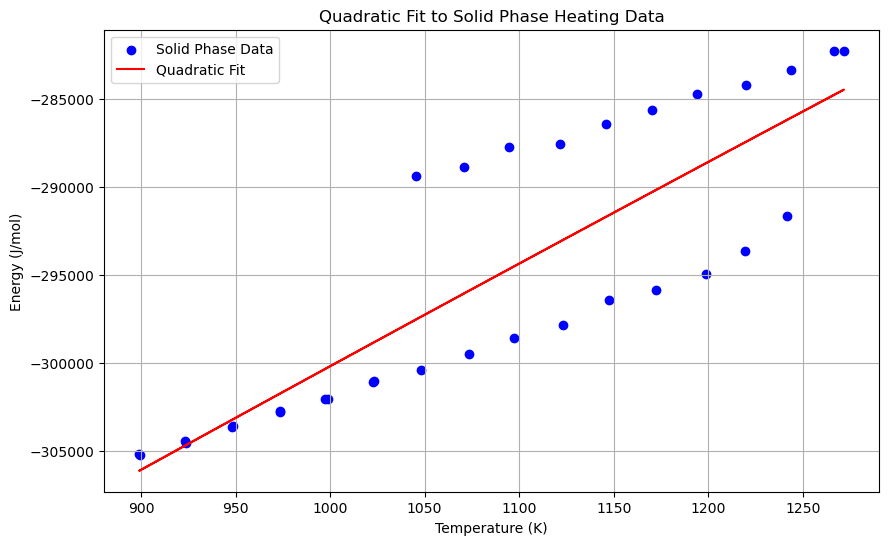

In [31]:
# Load the data
file_path = r'C:/Users/jhyang/OneDrive/文档/GitHub_Projects/MSE_760/Lab3-Assignment/Problem_2-1/prall.txt'
data = pd.read_csv(file_path, delim_whitespace=True, skiprows=1, names=['Temperature', 'Pressure', 'Volume', 'Energy'])

# Select solid phase data for heating (below melting point)
melting_temp = 1271.8  # melting temperature in K
solid_phase_data = data[(data['Temperature'] < melting_temp)]

# Convert Energy from eV/atom to J/mol
solid_phase_data['Energy'] = solid_phase_data['Energy'] * 96485.3  # Conversion factor

# Define the quadratic function for fitting
def quadratic(T, A, B, C):
    return A + B * T + C * T**2

# Fit the energy data to the quadratic function
T = solid_phase_data['Temperature']
U = solid_phase_data['Energy']  # Now in J/mol
params, covariance = curve_fit(quadratic, T, U)
A_fit, B_fit, C_fit = params

# Calculate the specific heat coefficients
A = B_fit  # Coefficient A in Table 6
B = 2 * C_fit  # Coefficient B in Table 6

# Output the results
print(f"Specific Heat Coefficient A: {A:.4f} J/mol or J/mol/K")
print(f"Specific Heat Coefficient B: {B:.4f} J/mol or J/mol/K")

# Plot to visualize the fit
plt.figure(figsize=(10, 6))
plt.scatter(T, U, label='Solid Phase Data', color='blue')
plt.plot(T, quadratic(T, *params), label='Quadratic Fit', color='red')
plt.xlabel('Temperature (K)')
plt.ylabel('Energy (J/mol)')
plt.title('Quadratic Fit to Solid Phase Heating Data')
plt.legend()
plt.grid(True)
plt.show()

### Problem 2.4

C:\Users\jhyang\AppData\Local\Temp\ipykernel_24408\724910081.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, skiprows=1, names=['Temperature', 'Pressure', 'Volume', 'Energy'])


Solid Linear Thermal Expansion Coefficient (Heating): 1.89371e-05 1/K
Liquid Linear Thermal Expansion Coefficient (Cooling): 1.27207e-05 1/K


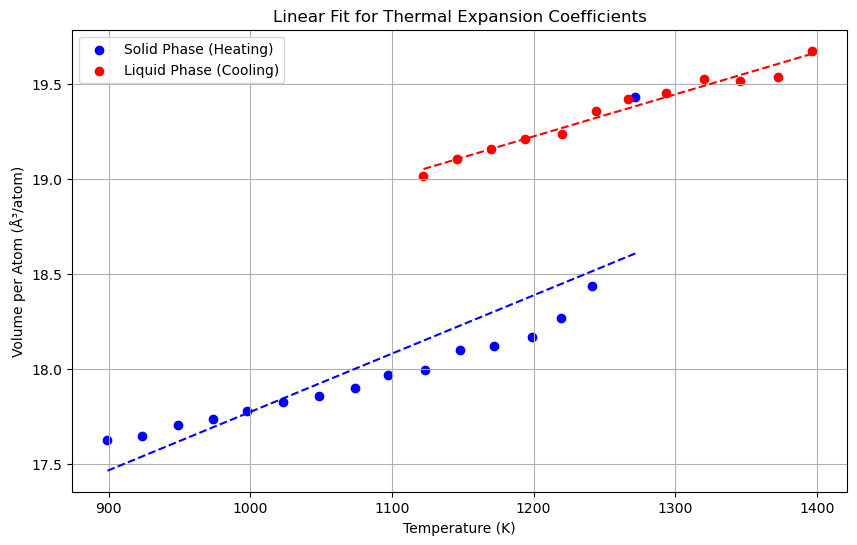

In [32]:
# Load data
file_path = r'C:/Users/jhyang/OneDrive/文档/GitHub_Projects/MSE_760/Lab3-Assignment/Problem_2-1/prall.txt'
data = pd.read_csv(file_path, delim_whitespace=True, skiprows=1, names=['Temperature', 'Pressure', 'Volume', 'Energy'])

# Convert volume to per atom basis (assuming 32 atoms in simulation)
data['Volume_per_atom'] = data['Volume'] / 32

# Separate heating and cooling data (assuming first half is heating and second half is cooling)
mid_index = len(data) // 2
heating_data = data[:mid_index]
cooling_data = data[mid_index:]

# Define melting temperature based on previous calculations
melting_temp_heating = 1271.8  # Adjust based on specific results
melting_temp_cooling = 1094.9  # Adjust based on specific results

# Select solid and liquid phases
solid_phase_heating = heating_data[heating_data['Temperature'] < melting_temp_heating]
liquid_phase_cooling = cooling_data[cooling_data['Temperature'] > melting_temp_cooling]

# Fit linear model to solid phase (heating curve)
slope_heating, intercept_heating, _, _, _ = linregress(solid_phase_heating['Temperature'], solid_phase_heating['Volume_per_atom'])
V_avg_heating = solid_phase_heating['Volume_per_atom'].mean()
alpha_heating = slope_heating / (3 * V_avg_heating)

# Fit linear model to liquid phase (cooling curve)
slope_cooling, intercept_cooling, _, _, _ = linregress(liquid_phase_cooling['Temperature'], liquid_phase_cooling['Volume_per_atom'])
V_avg_cooling = liquid_phase_cooling['Volume_per_atom'].mean()
alpha_cooling = slope_cooling / (3 * V_avg_cooling)

# Calculate linear thermal expansion coefficients
linear_alpha_heating = alpha_heating / 3
linear_alpha_cooling = alpha_cooling / 3

# Print final linear thermal expansion coefficients
print(f"Solid Linear Thermal Expansion Coefficient (Heating): {linear_alpha_heating:.5e} 1/K")
print(f"Liquid Linear Thermal Expansion Coefficient (Cooling): {linear_alpha_cooling:.5e} 1/K")

# Optional: If using Excel, include error values obtained from LINEST as well.

# Plot the linear fits for visualization
plt.figure(figsize=(10, 6))
plt.scatter(solid_phase_heating['Temperature'], solid_phase_heating['Volume_per_atom'], label='Solid Phase (Heating)', color='blue')
plt.plot(solid_phase_heating['Temperature'], slope_heating * solid_phase_heating['Temperature'] + intercept_heating, color='blue', linestyle='--')

plt.scatter(liquid_phase_cooling['Temperature'], liquid_phase_cooling['Volume_per_atom'], label='Liquid Phase (Cooling)', color='red')
plt.plot(liquid_phase_cooling['Temperature'], slope_cooling * liquid_phase_cooling['Temperature'] + intercept_cooling, color='red', linestyle='--')

plt.xlabel('Temperature (K)')
plt.ylabel('Volume per Atom (Å³/atom)')
plt.title('Linear Fit for Thermal Expansion Coefficients')
plt.legend()
plt.grid(True)
plt.show()

### Problem 2.5

In [33]:
# Step 1: Load data from files
# Load data from prall.txt
prall_data = pd.read_csv(r'C:/Users/jhyang/OneDrive/文档/GitHub_Projects/MSE_760/Lab3-Assignment/Problem_2-1/prall.txt', delim_whitespace=True)
prall_temperatures = prall_data['Temp']
prall_pressures = prall_data['Press']
prall_volumes = prall_data['Vol']

# Load data from rampdown_eqavg_900.txt
rampdown_data = pd.read_csv(r'C:/Users/jhyang/OneDrive/文档/GitHub_Projects/MSE_760/Lab3-Assignment/Problem_2-1/rampdown_eqavg_900.txt', 
                            delim_whitespace=True, comment='#', 
                            names=['TimeStep', 'Temperature', 'Pressure', 'Volume', 'Etotal'])
rampdown_temperatures = rampdown_data['Temperature']
rampdown_pressures = rampdown_data['Pressure']
rampdown_volumes = rampdown_data['Volume']

# Step 2: Select at least 6 data points for pressure and temperature analysis
selected_pressures = prall_pressures[:6]  # Select the first 6 pressure values as an example
selected_temperatures = prall_temperatures[:6]  # Select the first 6 temperature values as an example

# Step 3: Calculate the slope ∂P/∂T using linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(selected_temperatures, selected_pressures)
partial_P_T = slope  # Value of ∂P/∂T
print(f"Slope ∂P/∂T (Clausius-Clapeyron Equation): {partial_P_T} Pa/K")

# Step 4: Calculate average ΔV
delta_V = np.mean(prall_volumes[:6]) - np.mean(rampdown_volumes[:6])  # Example calculation for average ΔV
print(f"Average ΔV: {delta_V} m³")

# Step 5: Calculate entropy change ΔS using Clausius-Clapeyron equation
delta_S = delta_V * partial_P_T  # Value of ΔS
print(f"Entropy Change ΔS: {delta_S} J/K")

# Step 6: Calculate enthalpy change ΔH using ΔH = ΔS * Tm
Tm_avg = np.mean(selected_temperatures)  # Average Tm
delta_H = delta_S * Tm_avg  # Value of ΔH
print(f"Enthalpy Change ΔH: {delta_H} J")

# Step 7: Convert ΔS and ΔH to eV/atom (assuming Avogadro's number)
# Convert J to eV; 1 eV = 1.60218e-19 J
delta_S_eV = delta_S / 1.60218e-19
delta_H_eV = delta_H / 1.60218e-19
print(f"Entropy Change ΔS (eV/K atom): {delta_S_eV}")
print(f"Enthalpy Change ΔH (eV/atom): {delta_H_eV}")

# Step 8: Create a table and ensure each column has consistent length
table = {
    "Tm (K)": [Tm_avg],
    "P (Pa)": [selected_pressures.tolist()],  # Convert to list format for consistent length
    "T (K)": [selected_temperatures.tolist()],  # Convert to list format for consistent length
    "∂P/∂T (Pa/K)": [partial_P_T],
    "ΔS (eV/K atom)": [delta_S_eV],
    "ΔH (eV/atom)": [delta_H_eV],
    "ΔS(P0, Tm) = ΔH(P0, Tm) / Tm (eV/K atom)": [delta_H_eV / Tm_avg]
}

# Step 9: Output and style the table
df_table = pd.DataFrame(table)

# Style the table for display
styled_table = df_table.style.format({
    "Tm (K)": "{:.2f}",
    "P (Pa)": lambda x: ", ".join([f"{p:.2e}" for p in x]),
    "T (K)": lambda x: ", ".join([f"{t:.2f}" for t in x]),
    "∂P/∂T (Pa/K)": "{:.2e}",
    "ΔS (eV/K atom)": "{:.2e}",
    "ΔH (eV/atom)": "{:.2e}",
    "ΔS(P0, Tm) = ΔH(P0, Tm) / Tm (eV/K atom)": "{:.2e}"
}).set_caption("Calculation Results Table")

styled_table = styled_table.set_properties(**{
    'background-color': '#f5f5f5',
    'color': 'black',
    'border-color': 'black',
    'border-width': '1px',
    'border-style': 'solid',
    'font-size': '12px',
    'text-align': 'center'
})

# Display the styled table
styled_table


C:\Users\jhyang\AppData\Local\Temp\ipykernel_24408\3170653395.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  prall_data = pd.read_csv(r'C:/Users/jhyang/OneDrive/文档/GitHub_Projects/MSE_760/Lab3-Assignment/Problem_2-1/prall.txt', delim_whitespace=True)


Slope ∂P/∂T (Clausius-Clapeyron Equation): 0.03950604305770598 Pa/K
Average ΔV: 3.421281692164598 m³
Entropy Change ΔS: 0.1351613018431958 J/K
Enthalpy Change ΔH: 129.87240574450183 J
Entropy Change ΔS (eV/K atom): 8.43608719639465e+17
Enthalpy Change ΔH (eV/atom): 8.105980959973401e+20


C:\Users\jhyang\AppData\Local\Temp\ipykernel_24408\3170653395.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  rampdown_data = pd.read_csv(r'C:/Users/jhyang/OneDrive/文档/GitHub_Projects/MSE_760/Lab3-Assignment/Problem_2-1/rampdown_eqavg_900.txt',


,Tm (K),P (Pa),T (K),∂P/∂T (Pa/K),ΔS (eV/K atom),ΔH (eV/atom),"ΔS(P0, Tm) = ΔH(P0, Tm) / Tm (eV/K atom)"
0,960.87,"-1.92e+02, -2.54e+02, -1.53e+02, -2.35e+02, -2.54e+02, -1.69e+02","899.11, 923.78, 948.72, 973.41, 997.51, 1022.69",3.95e-02,8.44e+17,8.11e+20,8.44e+17
